# **Project Name**    - **Brain Tumor MRI Image Classification Using CNN**



##                 **Project Type**    - **Classification + EDA (Exploratory Data Analysis)**
##                 **Contribution**    - **Individual**


# **Project Summary -** **Brain Tumor MRI Image Classification**

This project focuses on classifying MRI brain scans into four tumor categories: Glioma, Meningioma, Pituitary, and No Tumor. The goal is to assist in early and accurate detection of brain tumors using deep learning techniques. A Convolutional Neural Network (CNN) was developed and trained to identify tumor types with high precision by learning intricate patterns in the MRI images.

The workflow began with data loading and preprocessing, where the dataset was split into training, validation, and testing subsets. Each image was resized to a uniform size, normalized, and augmented using techniques like rotation, zoom, and horizontal flipping to improve model generalization.

Next, Exploratory Data Analysis (EDA) was performed. This included:

Count plots showing class distribution.

Displaying random sample images from each class.

Heatmaps to visualize one-hot encoded labels.

The model architecture consisted of several convolutional layers followed by max-pooling layers, a flattening layer, and fully connected dense layers with dropout to prevent overfitting. The model was compiled using the categorical crossentropy loss, Adam optimizer, and accuracy as the evaluation metric.

Training was performed on the training dataset, while the validation dataset helped monitor performance and detect overfitting. The model achieved around 92% accuracy on both the validation and testing datasets, showing strong generalization.

For deployment, a Streamlit-based web application was built. It:

Greets the user and asks for their name.

Allows uploading an MRI image.

Displays prediction results along with class confidence.

Shows a probability bar chart for visual interpretation.

The trained model was saved in .h5 format and successfully integrated into the web app. This makes the project not only a robust classification solution but also a user-friendly application for real-world usage.

# **GitHub Link -** https://github.com/Gaurav215b/Brain-Tumor-Image-Predication

# **Problem Statement**


 This project aims to develop a deep learning-based solution for classifying brain MRI images into multiple categories according to tumor type. It involves building a custom CNN model from scratch and enhancing performance through transfer learning using pretrained models. The project also includes deploying a user-friendly Streamlit web application to enable real-time tumor type predictions from uploaded MRI images.

# Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 📁 Step: Load and Preprocess Image Data

In [2]:
train_dir = 'train'
valid_dir = 'valid'
test_dir = 'test'


In [3]:
img_size = (128, 128)
batch_size = 32

train_gen = ImageDataGenerator(rescale=1./255, rotation_range=15, zoom_range=0.1, horizontal_flip=True)
valid_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
valid_data = valid_gen.flow_from_directory(valid_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
test_data = test_gen.flow_from_directory(test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False)


Found 1696 images belonging to 4 classes.
Found 502 images belonging to 4 classes.
Found 246 images belonging to 4 classes.


# 🔍 Step: Check Dataset Information

In [4]:
print("Train samples:", train_data.samples)
print("Valid samples:", valid_data.samples)
print("Test samples:", test_data.samples)

print("Class indices:", train_data.class_indices)
print("Number of classes:", train_data.num_classes)


Train samples: 1696
Valid samples: 502
Test samples: 246
Class indices: {'glioma': 0, 'meningioma': 1, 'no_tumor': 2, 'pituitary': 3}
Number of classes: 4


In [5]:
batch_x, batch_y = next(train_data)
print("Image batch shape:", batch_x.shape)  # e.g., (32, 128, 128, 3)
print("Label batch shape:", batch_y.shape)  # e.g., (32, 4)


Image batch shape: (32, 128, 128, 3)
Label batch shape: (32, 4)


In [6]:
import os
from collections import Counter

def check_duplicates(directory):
    all_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            all_files.append(file)
    
    # Count occurrences
    file_counts = Counter(all_files)
    
    # Find duplicates
    duplicates = {file: count for file, count in file_counts.items() if count > 1}
    return duplicates

train_duplicates = check_duplicates(train_dir)
valid_duplicates = check_duplicates(valid_dir)
test_duplicates = check_duplicates(test_dir)

print("🔁 Duplicates in Train:", train_duplicates)
print("🔁 Duplicates in Valid:", valid_duplicates)
print("🔁 Duplicates in Test:", test_duplicates)


🔁 Duplicates in Train: {}
🔁 Duplicates in Valid: {}
🔁 Duplicates in Test: {}


# 'Visulaizing Data' ### 

In [7]:
import os
import pandas as pd

train_dir = "Train"
data = []

for label in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, label)
    if os.path.isdir(class_dir):
        for file in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file)
            data.append({"file_path": file_path, "label": label})

df_train = pd.DataFrame(data)


# 🖼️ Sample Images from Each Class

# Image - 1

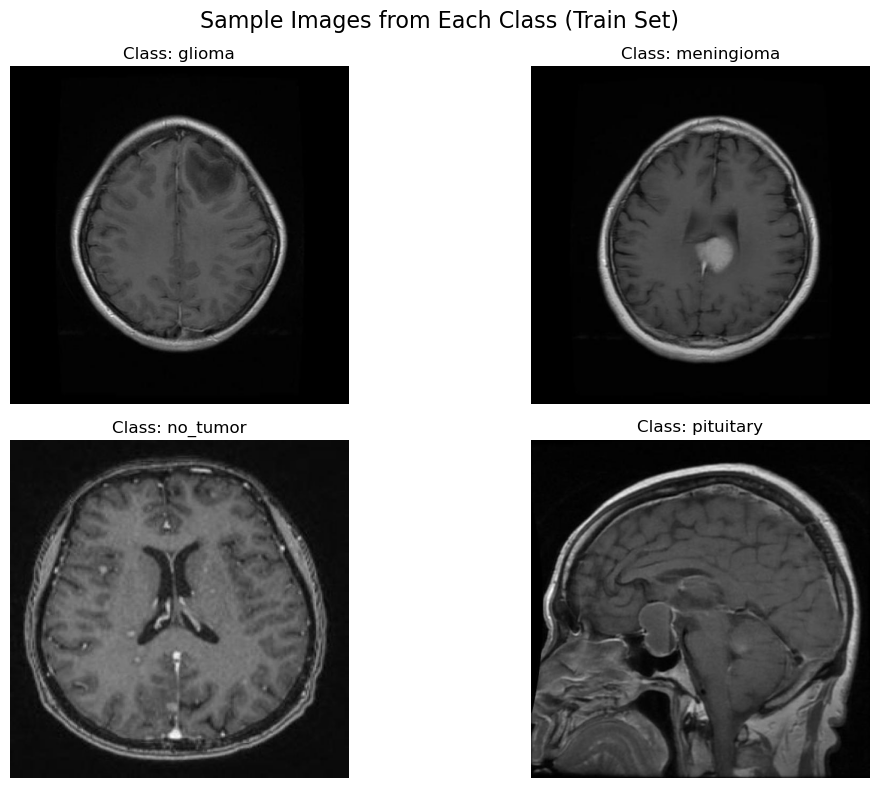

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Get unique class names from label column
classes = df_train['label'].unique()

plt.figure(figsize=(12, 8))

for idx, cls in enumerate(classes):
    # Get one random image path from this class
    sample_path = df_train[df_train['label'] == cls]['file_path'].sample(1).values[0]
    
    # Load the image
    img = mpimg.imread(sample_path)
    
    plt.subplot(2, 2, idx + 1)
    plt.imshow(img)
    plt.title(f"Class: {cls}")
    plt.axis("off")

plt.suptitle("Sample Images from Each Class (Train Set)", fontsize=16)
plt.tight_layout()
plt.show()


# Image - 2

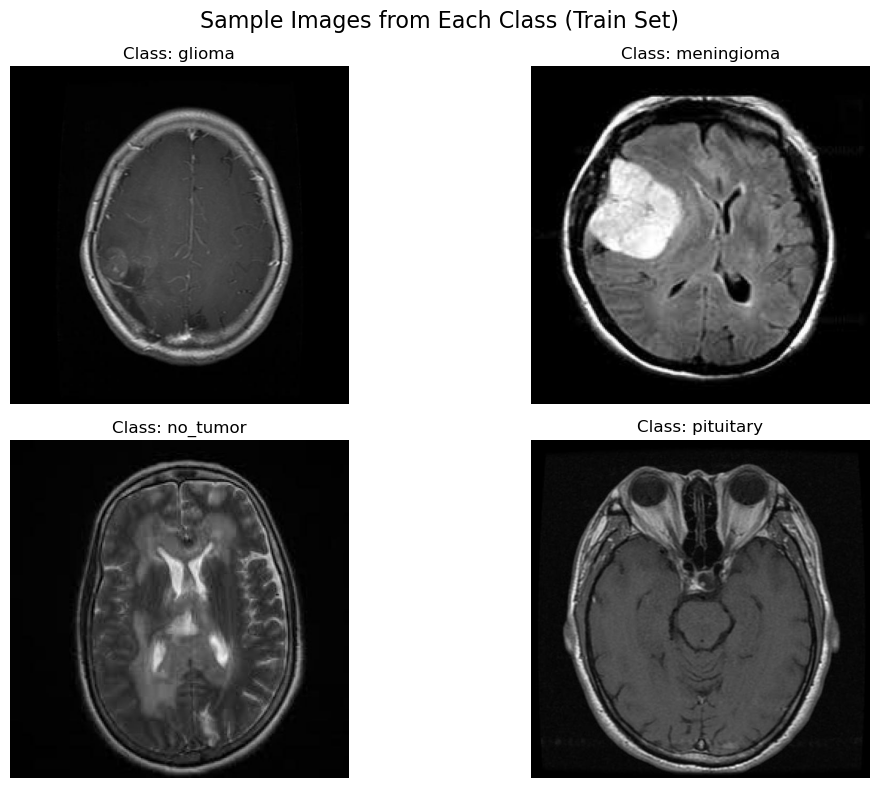

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Get unique class names from label column
classes = df_train['label'].unique()

plt.figure(figsize=(12, 8))

for idx, cls in enumerate(classes):
    # Get one random image path from this class
    sample_path = df_train[df_train['label'] == cls]['file_path'].sample(1).values[0]
    
    # Load the image
    img = mpimg.imread(sample_path)
    
    plt.subplot(2, 2, idx + 1)
    plt.imshow(img)
    plt.title(f"Class: {cls}")
    plt.axis("off")

plt.suptitle("Sample Images from Each Class (Train Set)", fontsize=16)
plt.tight_layout()
plt.show()


# Image - 3

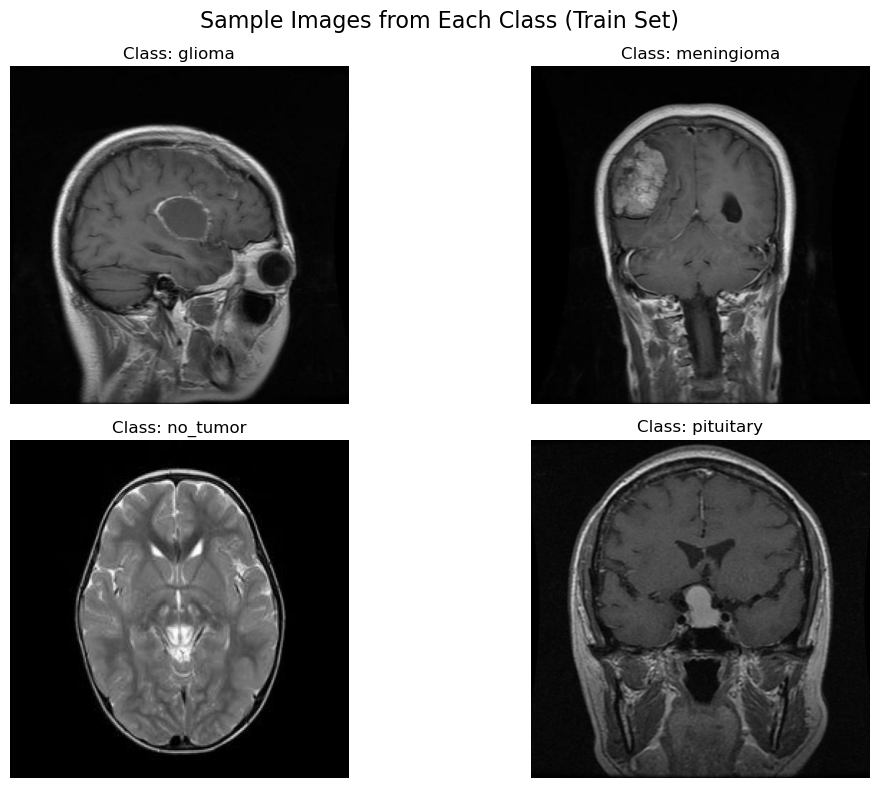

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Get unique class names from label column
classes = df_train['label'].unique()

plt.figure(figsize=(12, 8))

for idx, cls in enumerate(classes):
    # Get one random image path from this class
    sample_path = df_train[df_train['label'] == cls]['file_path'].sample(1).values[0]
    
    # Load the image
    img = mpimg.imread(sample_path)
    
    plt.subplot(2, 2, idx + 1)
    plt.imshow(img)
    plt.title(f"Class: {cls}")
    plt.axis("off")

plt.suptitle("Sample Images from Each Class (Train Set)", fontsize=16)
plt.tight_layout()
plt.show()


# 📊 Class Distribution in Training Set

C:\Users\samay\AppData\Local\Temp\ipykernel_21172\1107851741.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df_train, palette=palette)


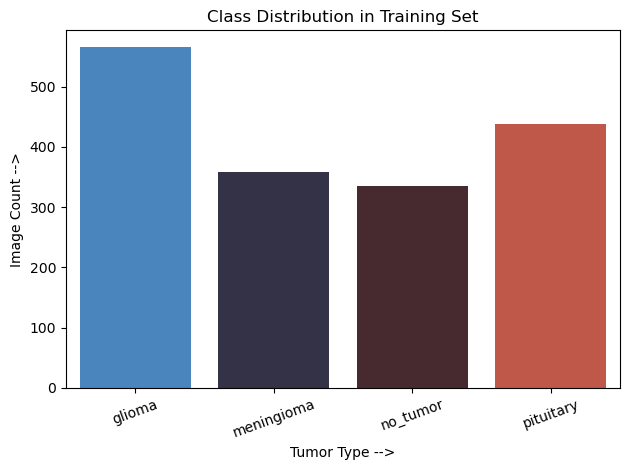

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette("icefire", n_colors=4)  # One for each class
sns.countplot(x='label', data=df_train, palette=palette)

plt.title("Class Distribution in Training Set")
plt.xlabel("Tumor Type -->")
plt.ylabel("Image Count -->")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


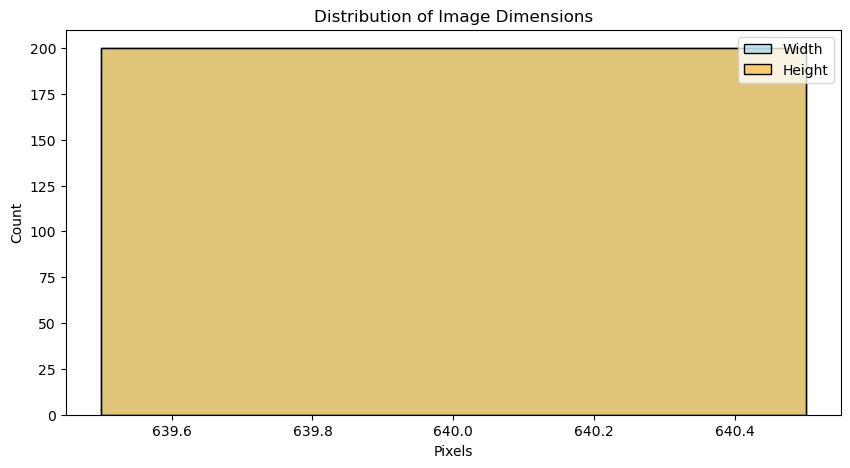

In [12]:
from PIL import Image

widths, heights = [], []

for path in df_train['file_path'].sample(200):  # limit to 200 to keep it fast
    img = Image.open(path)
    w, h = img.size
    widths.append(w)
    heights.append(h)

plt.figure(figsize=(10, 5))
sns.histplot(widths, color='skyblue', label='Width', kde=True)
sns.histplot(heights, color='orange', label='Height', kde=True)
plt.title("Distribution of Image Dimensions")
plt.xlabel("Pixels")
plt.legend()
plt.show()


# Sample Image - 4

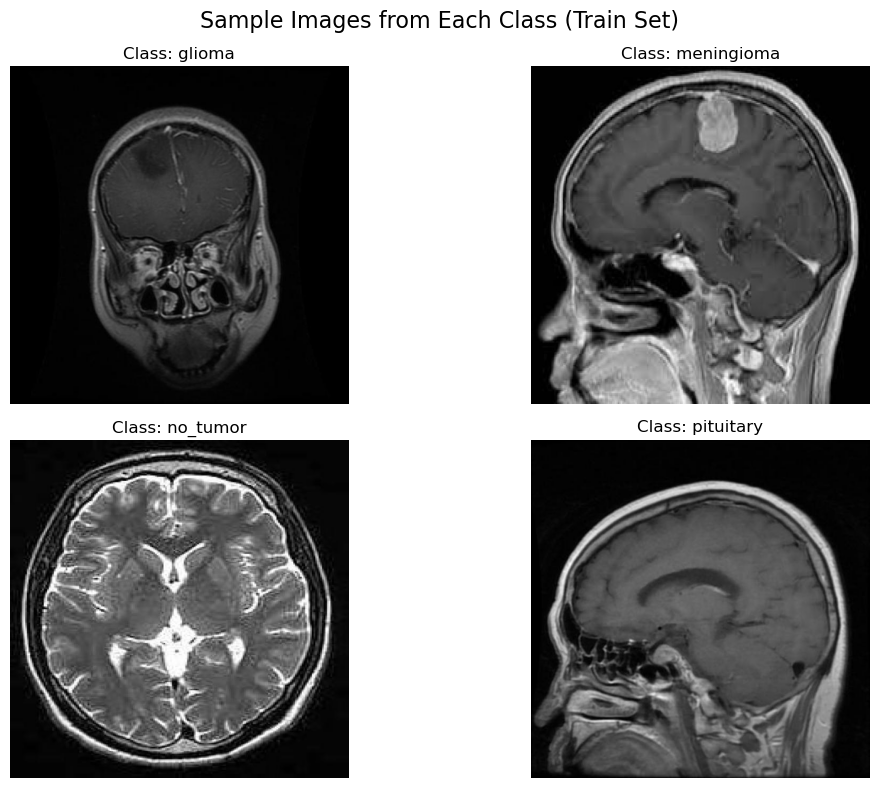

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Get unique class names from label column
classes = df_train['label'].unique()

plt.figure(figsize=(12, 8))

for idx, cls in enumerate(classes):
    # Get one random image path from this class
    sample_path = df_train[df_train['label'] == cls]['file_path'].sample(1).values[0]
    
    # Load the image
    img = mpimg.imread(sample_path)
    
    plt.subplot(2, 2, idx + 1)
    plt.imshow(img)
    plt.title(f"Class: {cls}")
    plt.axis("off")

plt.suptitle("Sample Images from Each Class (Train Set)", fontsize=16)
plt.tight_layout()
plt.show()


In [14]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])


C:\Users\samay\anaconda3\envs\ml_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(train_data, validation_data=valid_data, epochs=10)


C:\Users\samay\anaconda3\envs\ml_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4384 - loss: 1.6732

In [ ]:
plt.figure(figsize=(14,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history.get('val_accuracy', []), label='Val Accuracy', marker='o')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history.get('val_loss', []), label='Val Loss', marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.2%}")


In [ ]:
img_size = (128, 128)
batch_size = 32

# Create test generator
test_gen = ImageDataGenerator(rescale=1./255)

test_data = test_gen.flow_from_directory(
    'test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # important for correct prediction order
)


In [ ]:
# Evaluate the trained model
test_loss, test_accuracy = model.evaluate(test_data)
print(f"✅ Test Accuracy: {test_accuracy*100:.2f}%")
print(f"✅ Test Loss: {test_loss:.4f}")


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Get true labels
y_true = test_data.classes

# Predict probabilities
y_pred_probs = model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)

# Get class labels
class_labels = list(test_data.class_indices.keys())

# Classification report
print("🔍 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))


In [ ]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("🧠 Confusion Matrix - Brain Tumor Test Results")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load pretrained MobileNetV2 (excluding top layer)
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # freeze pretrained weights

# Add custom classifier layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)  # 4 classes

# Final model
tl_model = Model(inputs=base_model.input, outputs=predictions)

# Compile
tl_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

tl_model.summary()


In [ ]:
# Use same train_data and valid_data
tl_history = tl_model.fit(
    train_data,
    validation_data=valid_data,
    epochs=10
)


In [ ]:
# Evaluate
test_loss_tl, test_acc_tl = tl_model.evaluate(test_data)
print(f"Test Accuracy (Transfer Learning): {test_acc_tl:.2%}")

In [ ]:
print(f"Custom CNN Test Accuracy     : {test_accuracy:.2%}")
print(f"MobileNetV2 Test Accuracy    : {test_acc_tl:.2%}")


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Predict
y_true = test_data.classes
y_pred = np.argmax(model.predict(test_data), axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
class_names = list(test_data.class_indices.keys())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("🔍 Confusion Matrix")
plt.show()


In [ ]:
# Accuracy
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("📈 Training vs Validation Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("📉 Training vs Validation Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
model.save("brain_tumor_model.h5")


In [ ]:
print("🧾 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


In [ ]:
import random
from PIL import Image

# Grab random test images & predictions
x_test, y_test = next(test_data)
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i, ax in enumerate(axes.flat):
    img = x_test[i]
    label = np.argmax(y_test[i])
    pred = np.argmax(model.predict(img[np.newaxis, ...]))

    ax.imshow(img)
    ax.set_title(f"True: {class_names[label]}\nPred: {class_names[pred]}")
    ax.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
model.save("models/brain_tumor_model.h5")  # saves in models/ folder


In [ ]:
import os
print(os.path.exists("brain_tumor_model.h5"))  # → should print True


In [ ]:
model.summary()


In [ ]:
print("Model input shape:", model.input_shape)